In [1]:
import numpy as np
from trapeze import trapeze_method
from derivative import derivative
from sympson import sympsonMethod
from sympson import sympson_method
import mpmath 


In [2]:
def integral_func(x:float, m:float, t: float):
    return np.cos(m*t - x * np.sin(t))

def Bessel(x: float, m: int, method, low_limit, high_limit, dx = 0.1):
    return  method(integral_func,x,m, low_limit, high_limit, dx) / np.pi

In [3]:
from scipy.special import jv
grid = np.arange(0, np.pi, 0.00000001)
h = 0.00001
trapeze_method(integral_func, 1, 1, grid) / np.pi, jv(1, 1), (trapeze_method(integral_func, 1 + h, 0, grid) / np.pi - trapeze_method(integral_func, 1-h, 0, grid) / np.pi)/(2*h)

KeyboardInterrupt: 

In [ ]:
def Bessel_new(x: float, m: int, method, low_limit, high_limit, dx = 0.1):
    return 1/np.pi * method(low_limit, high_limit, dx, integral_func,x, m)

In [ ]:
from scipy.special import jv

In [ ]:
trapeze_method(integral_func, 1, 1, 0, np.pi, 0.00001)/np.pi, jv(1, 1)

(0.44005143040879885, 0.44005058574493355)

In [ ]:
Bessel(2.5, 1, trapeze_method, 0, np.pi, 0.00001)

0.4970949471281391

In [ ]:
Bessel(2.5, 1, sympson_method, 0, np.pi, 0.00001)

0.4970949471281389

In [ ]:
def root(x):
    return np.longdouble(np.power(x, 1/2))
root(5)

2.236067977499789805

In [ ]:
dx = 0.0000001

Bessel(2.5, 1, sympsonMethod, 0, np.pi, dx)

TypeError: unsupported operand type(s) for -: 'float' and 'function'

In [ ]:

(Bessel(2.5 + dx, 0, trapeze_method, 0, np.pi, dx) - Bessel(2.5, 0, trapeze_method, 0, np.pi, dx)) / dx

-0.4970940808285418

In [ ]:

from bokeh.models import DatetimeTickFormatter, NumeralTickFormatter
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook, show
output_notebook()


dx = np.longdouble(1)
x = []
y = []
for i in range(1, 27):
    J1 = Bessel(2.5, 1, trapeze_method, 0, np.pi, dx)
    J0 = (Bessel(2.5 + dx, 0, trapeze_method, 0, np.pi, dx) - Bessel(2.5, 0, trapeze_method, 0, np.pi, dx))/dx
    dx/=2
    x.append(i)
    y.append(J1+J0)

p = figure(
    title = "differences",

    sizing_mode = 'stretch_width', 
    max_width = 900, 
   
)

p.circle(x, y, size = 5)
p.line(x, y, color = 'blue', line_width=2)
p.line(x, 1e-10, color = 'red')
show(p)
print(min(y))


Loading BokehJS ...

KeyboardInterrupt: 

0.00050701015911792707194
0.00050696206466622586767
0.00050695376235474349765
0.0005069529973122665477
0.00050695294831645830467
0.00050695294387556620617
0.00050695294182233730003
0.0005069529487449038824
0.0005069529700611859552
0.00050695299183720087
0.000506953019950137499
0.00050695335009580150275
0.00050695346767099146103
0.00050695397937877861345
0.00050695503239973283685


0.00050695503239973283685

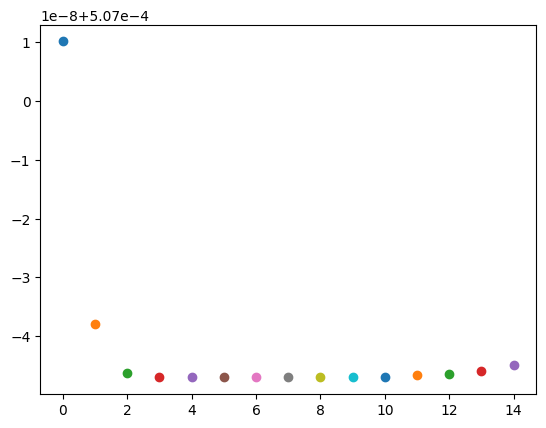

In [ ]:
import matplotlib.pyplot as plt
def deriv(val1, val2, dx):
    return (val1 - val2) / (dx)
dx = 0.01
h = 0.001
h = np.longdouble(h)
# x = []
# y = []
# Bessel = np.vectorize(Bessel)
grid = np.arange(dx, 2*np.pi,dx)
J1 = []
J0 = []
for j in range(15):
    J1 = []
    J0 = []
    for i in grid:
        J1.append(Bessel(i, 1, trapeze_method, 0, np.pi, 0.01))
    # J0_no = Bessel(grid, 0, trapeze_method, 0, np.pi, 0.01)
        J0.append((Bessel(i+h, 0, trapeze_method, 0, np.pi, 0.01) - Bessel(i-h, 0, trapeze_method, 0, np.pi, 0.01)) / (2*h))
    print(np.max(np.array(J1) + np.array(J0)))
    plt.scatter(j, np.max(np.array(J1) + np.array(J0)))
    h/=2
# dx/=2
# x.append(i)
# y.append(J1+J0)

# # p = figure(
# #     title = "differences",

# #     sizing_mode = 'stretch_width', 
# #     max_width = 900, 
   
# # )

# # p.circle(x, y, size = 5)
# # p.line(x, y, color = 'blue', line_width=2)
# # p.line(x, 1e-10, color = 'red')
# # show(p)
# # print(min(y))
np.max(np.array(J1) + np.array(J0))

In [8]:
from scipy.special import jv
from scipy.integrate import simpson

In [5]:
jv(1, 2.5), Bessel(2.5, 1, sympson_method, 0, np.pi, 0.00000001), (Bessel(2.5+0.000001, 0, trapeze_method, 0, np.pi, 0.00000001)- Bessel(2.5-0.000001, 0, trapeze_method, 0, np.pi, 0.00000001))/0.000002

(0.4970941024642741, 0.4970943105083663, -0.49709410281789657)

In [10]:
simpson(lambda x: x**2, dx = 1)

IndexError: tuple index out of range

In [52]:
def bessel_function(m, x, t):
    return np.cos(m * t - x * np.sin(t)) / np.pi
def trapeze(function, grid):
    res = function(grid)
    step = grid[1] - grid[0]
    result = step * (np.sum(res) - 0.5 * (res[0] + res[-1]))
    return result
def sympson(function, grid):
    step = grid[1] - grid[0]
    res = function(grid)
    result = (step/6) * (res[0] + 4 * np.sum(res[1:-1]) + res[-1])
    return result
grid_bessel = np.linspace(0, np.pi, 1000)

In [53]:
len(grid_bessel)

1000

In [54]:
x  = np.linspace(0, 2 * np.pi, 1000)

In [55]:
m = 1
h = 0.00001 
j1 = np.vectorize(lambda x: trapeze(lambda t: bessel_function(m,1,t), grid_bessel))(x)
j0_der = np.vectorize(lambda x: (trapeze(lambda t: bessel_function(0,1+h,t), grid_bessel) - trapeze(lambda t: bessel_function(0,1-h,t), grid_bessel))/(2*h))(x)
np.max(j1+j0_der)

2.2319923687064147e-12

In [56]:
m = 1
h = 0.00001 
j1 = np.vectorize(lambda x: sympson(lambda t: bessel_function(m,1,t), grid_bessel))(x)
j0_der = np.vectorize(lambda x: (sympson(lambda t: bessel_function(0,1+h,t), grid_bessel) - sympson(lambda t: bessel_function(0,1-h,t), grid_bessel))/(2*h))(x)
np.max(j1+j0_der)

-3.6243230638888235e-13